In [42]:
%matplotlib inline

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

#### Question 1
Write  a computer program capable of reducing the number of intensity levels  in an image from 256 to 2, in integer powers of 2. The desired number of  intensity levels needs to be a variable input to your program.

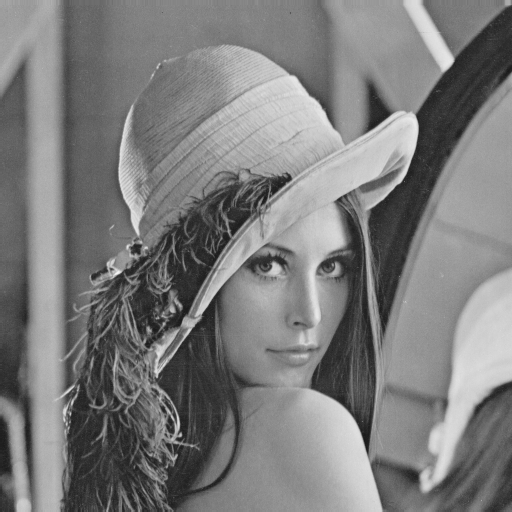

In [57]:
# Open the image and convert it to grayscale
lena = Image.open('lena.png').convert('L')
lena

### Code

In [63]:
def reduce_intensity_levels(image, n):
    # Convert image to grayscale
    image = image.convert("L")
    
    # Rescale intensity values
    data = np.array(image)
    data = np.round(data / (256/n)).astype(np.uint8)
    
    # Create and return modified image
    return Image.fromarray(data)

### Results

<Figure size 2000x1000 with 0 Axes>

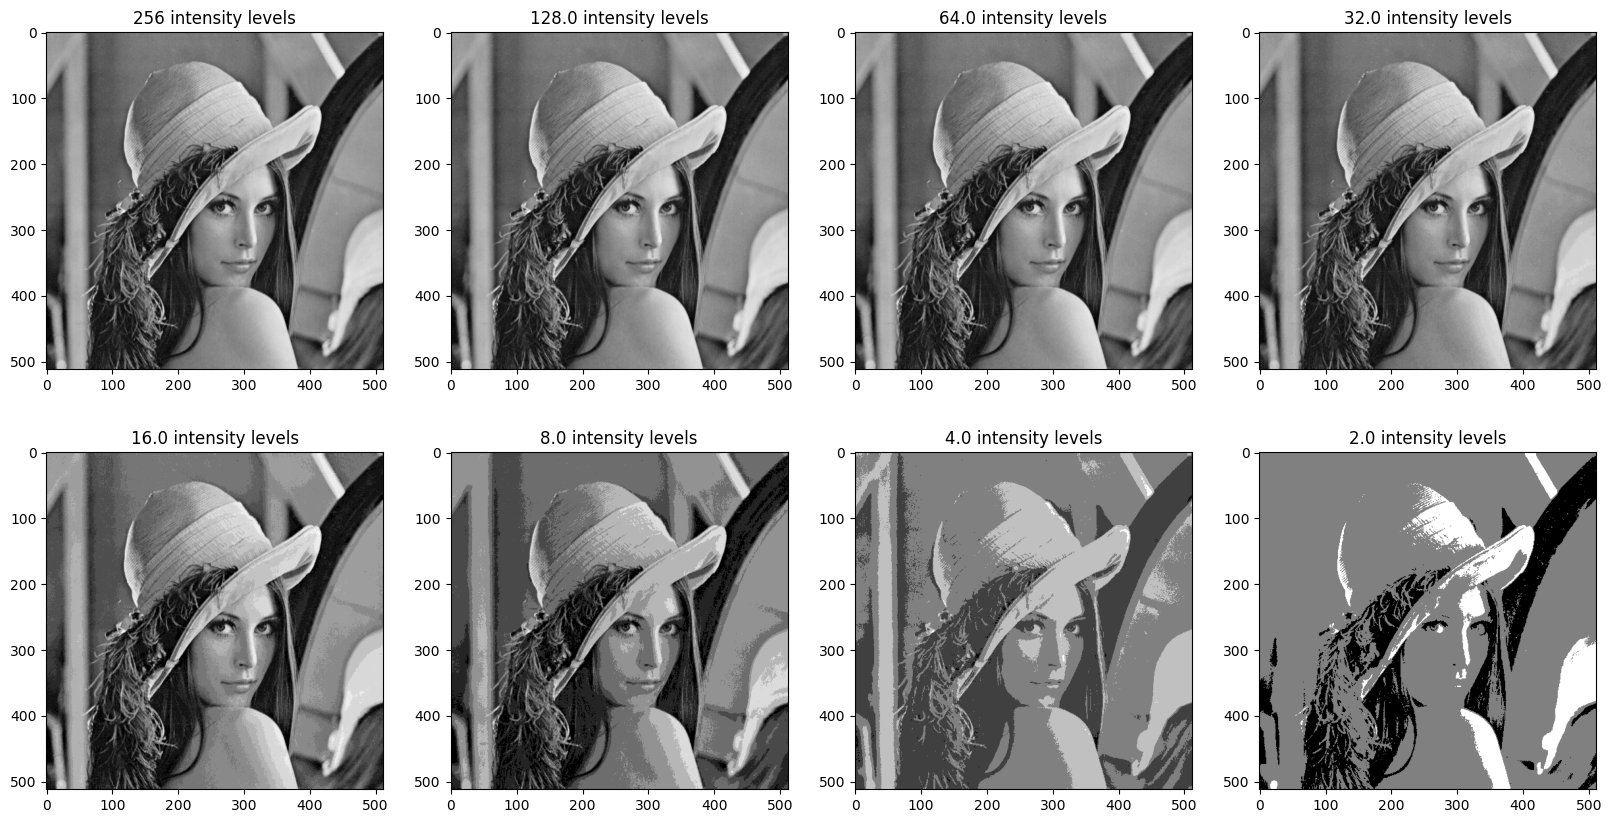

In [75]:
plt.gray()
f, axarr = plt.subplots(2, 4)
levels = 256
for i in range(2):
    for j in range(4):
        im_mod = reduce_intensity_levels(lena, levels)
        axarr[i,j].imshow(im_mod);
        axarr[i, j].set_title('{} intensity levels'.format(levels))
        levels /= 2 

#### Observation: reducing the intensity level of a grayscale image reduces the variations of possible gray values that can be present in the image. The image looses a lot of detail.

#### Question 2
Using  any programming language you feel comfortable with (it is though  recommended to use the provided free Matlab), load an image and then  perform a simple spatial 3x3 average of image pixels. In other words,  replace the value of every pixel by the average of the values in its 3x3  neighborhood. If the pixel is located at (0,0), this means averaging  the values of the pixels at the positions (-1,1), (0,1), (1,1), (-1,0),  (0,0), (1,0), (-1,-1), (0,-1), and (1,-1). Be careful with pixels at the  image boundaries. Repeat the process for a 10x10 neighborhood and again  for a 20x20 neighborhood. Observe what happens to the image.

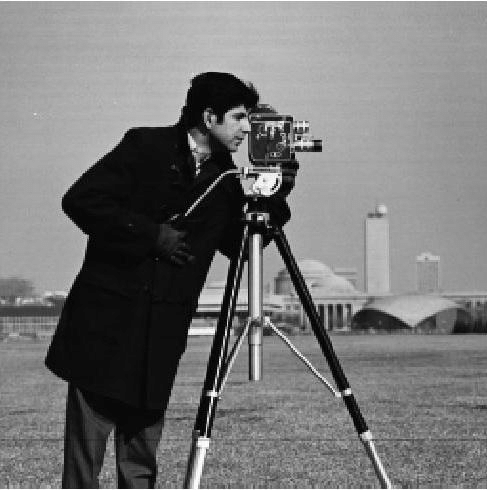

In [58]:
# Open the image and convert it to grayscale
cman = Image.open("camera_man.png").convert("L")
cman

### Code

In [45]:
def spatial3x3(img):
    # Convert the image to a numpy array
    image_array = np.array(img)

    # Create a copy of the original image
    averaged_image = image_array.copy()

    # Iterate over the rows and columns of the image
    for i in range(1, image_array.shape[0] - 1):
        for j in range(1, image_array.shape[1] - 1):
            # Calculate the average of the 3x3 neighborhood
            neighborhood_average = np.mean(image_array[i-1:i+2, j-1:j+2])
            # Replace the pixel value with the average
            averaged_image[i, j] = neighborhood_average

    # Convert the averaged image back to a PIL image
    res = Image.fromarray(averaged_image)
    
    # return the PIL image
    return res


In [46]:
def spatial10x10(img):
    # Convert the image to a numpy array
    image_array = np.array(img)

    # Pad the image with zeros
    padded_image = np.pad(image_array, ((5, 5), (5, 5)), mode="constant", constant_values=0)

    # Create a copy of the padded image
    averaged_image = padded_image.copy()

    # Iterate over the rows and columns of the padded image
    for i in range(5, padded_image.shape[0] - 5):
        for j in range(5, padded_image.shape[1] - 5):
            # Calculate the average of the 10x10 neighborhood
            neighborhood_average = np.mean(padded_image[i-5:i+6, j-5:j+6])
            # Replace the pixel value with the average
            averaged_image[i, j] = neighborhood_average

    # Trim the padding from the averaged image
    averaged_image = averaged_image[5:-5, 5:-5]

    # Convert the averaged image back to a PIL image
    res = Image.fromarray(averaged_image)
            
    # return the PIL image
    return res
    

In [47]:
def spatial20x20(img):
    # Convert the image to a numpy array
    image_array = np.array(img)

    # Pad the image with zeros
    padded_image = np.pad(image_array, ((10, 10), (10, 10)), mode="constant", constant_values=0)

    # Create a copy of the padded image
    averaged_image = padded_image.copy()

    # Iterate over the rows and columns of the padded image
    for i in range(10, padded_image.shape[0] - 10):
        for j in range(10, padded_image.shape[1] - 10):
            # Calculate the average of the 20x20 neighborhood
            neighborhood_average = np.mean(padded_image[i-10:i+11, j-10:j+11])
            # Replace the pixel value with the average
            averaged_image[i, j] = neighborhood_average

    # Trim the padding from the averaged image
    averaged_image = averaged_image[10:-10, 10:-10]

    # Convert the averaged image back to a PIL image
    res = Image.fromarray(averaged_image)
    
    # return the PIL image
    return res

### Results

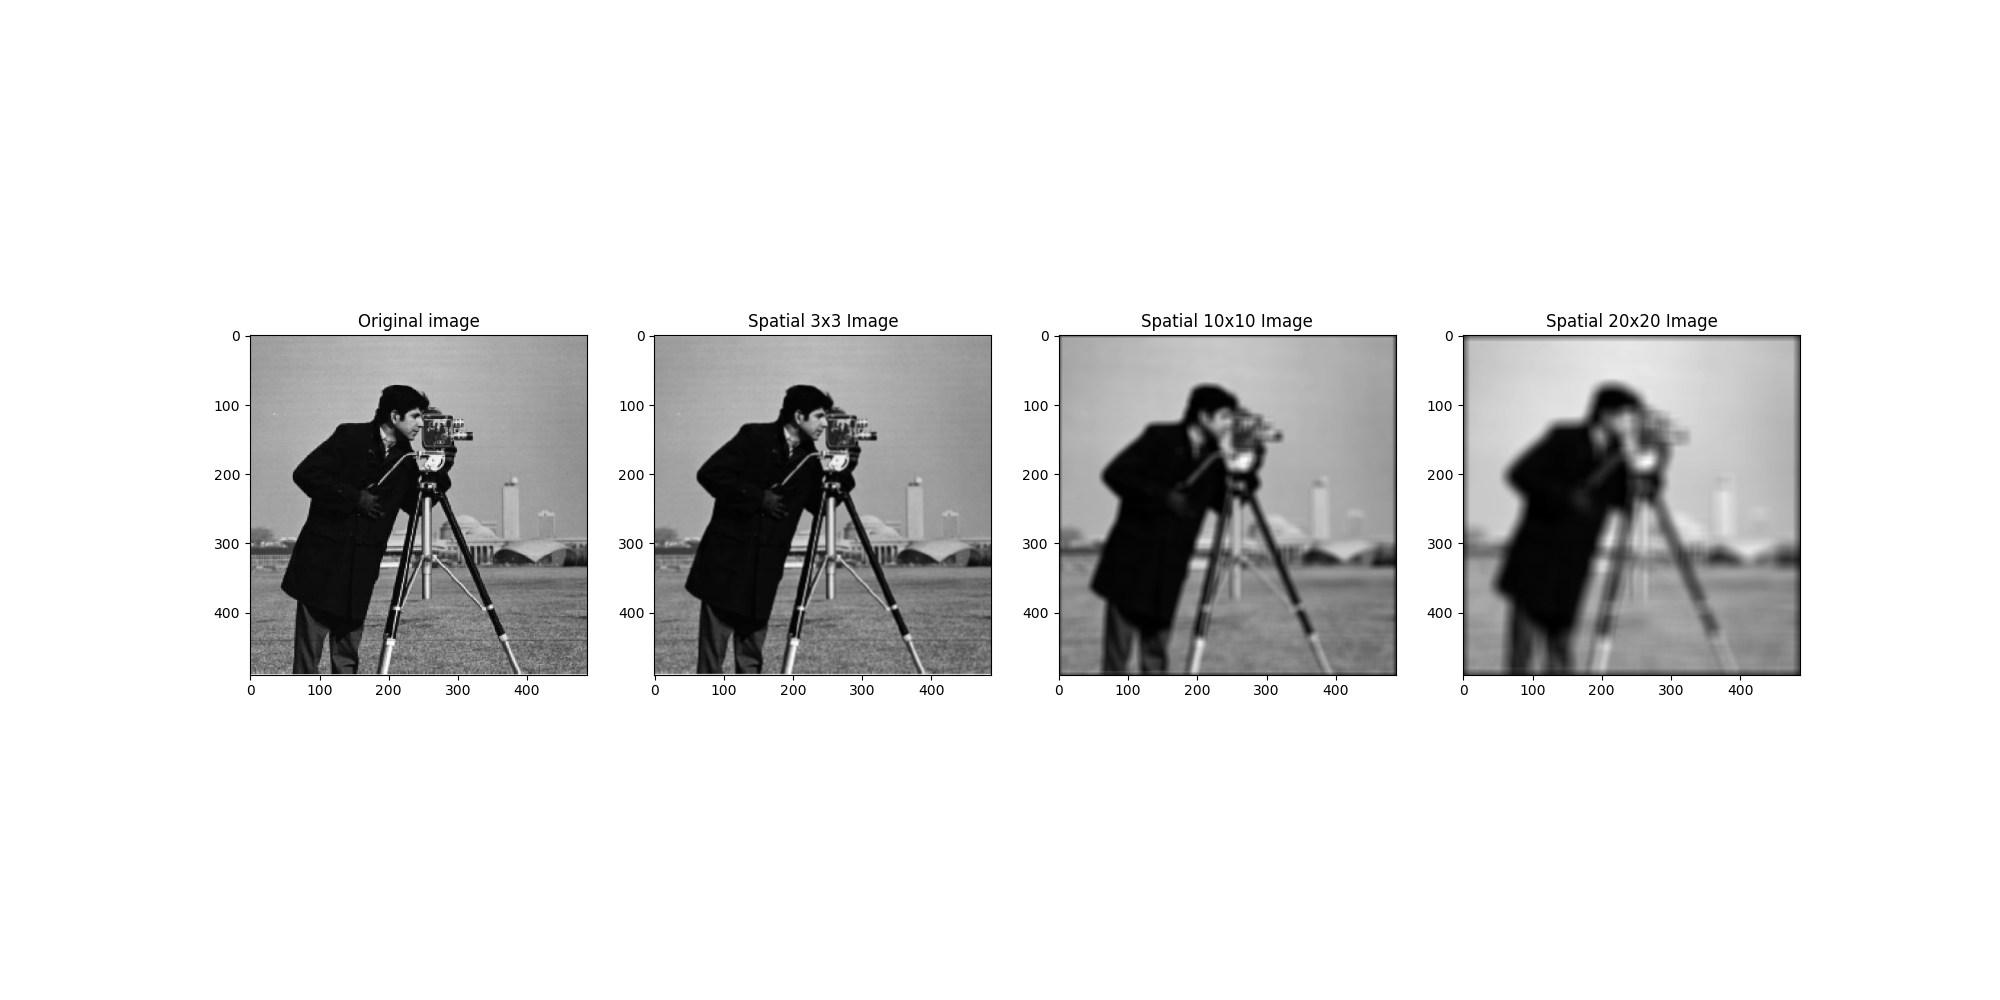

<Figure size 2000x1000 with 0 Axes>

In [48]:
# Create a figure with 4 subplots
f, axarr = plt.subplots(1, 4)

# Display the original image on the first subplot
axarr[0].imshow(cman, cmap='gray')
axarr[0].set_title('Original image')

# Display the 3x3 averaged image on the second subplot
axarr[1].imshow(spatial3x3(cman), cmap='gray')
axarr[1].set_title('Spatial 3x3 Image')

# Display the 10x10 averaged image on the third subplot
axarr[2].imshow(spatial10x10(cman), cmap='gray')
axarr[2].set_title('Spatial 10x10 Image')

# Display the 20x20 averaged image on the fourth subplot
axarr[3].imshow(spatial20x20(cman), cmap='gray')
axarr[3].set_title('Spatial 20x20 Image')

# Show the figure
plt.show()

#### Observation: Peforming a Spatial nXn average of the image causes the image to become burred. Increase in n also increases the effect of the  blurr.

#### Question 3
Rotate the image by 45 and 90 degrees.

### code

In [76]:
def rotate_image(image, degree):
    return image.rotate(degree)

### Results

Text(0.5, 1.0, 'Lena rotated at a 90 degree angle')

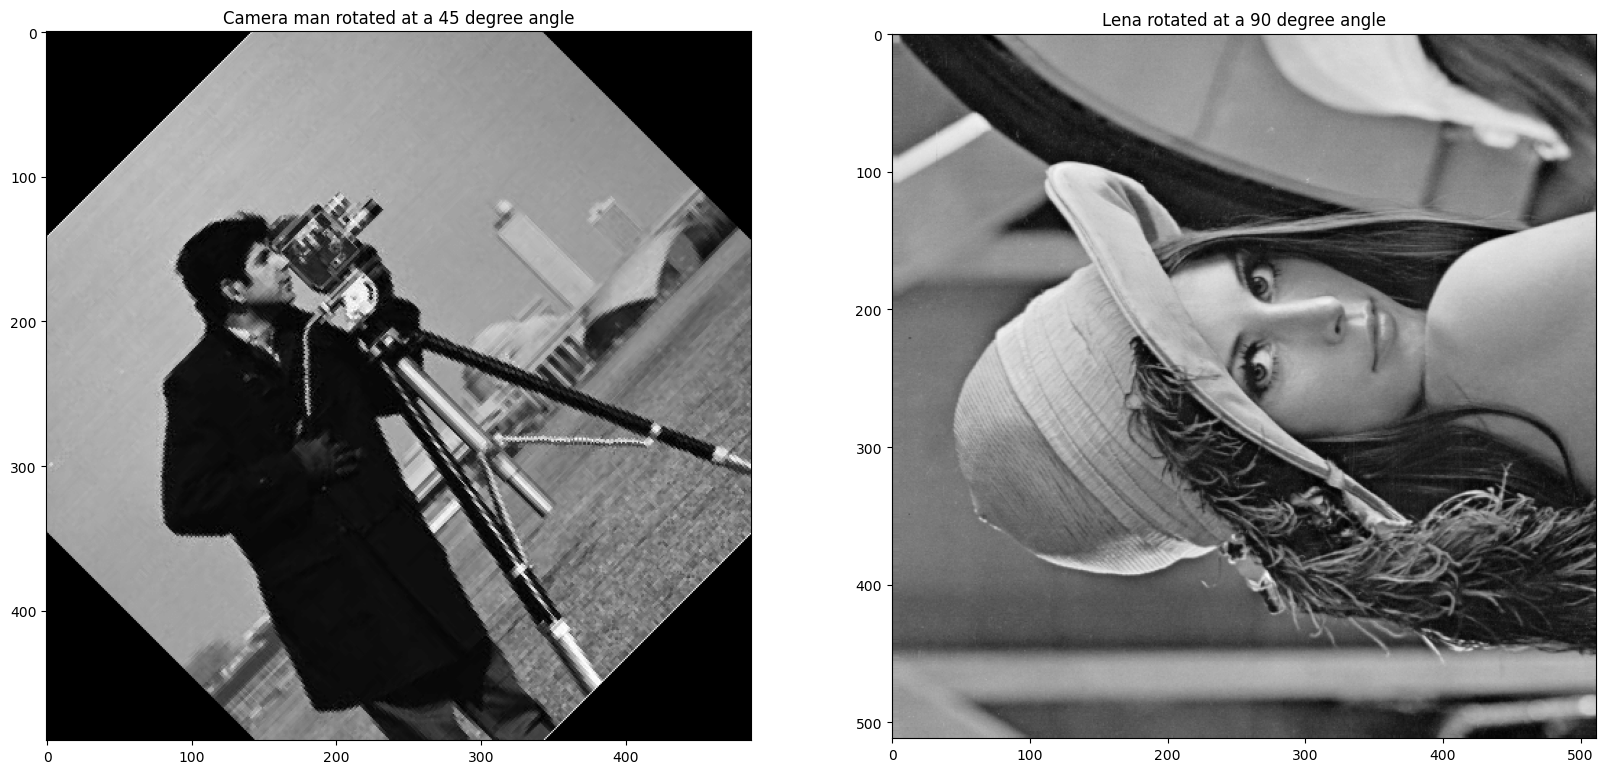

In [77]:
f, axarr = plt.subplots(1, 2)

# Display the cman image at a 45 degree angle on the first subplot
axarr[0].imshow(rotate_image(cman, 45), cmap='gray')
axarr[0].set_title('Camera man rotated at a 45 degree angle')

# Display the lena image at a 90 degree angle on the second subplot
axarr[1].imshow(rotate_image(lena, 90), cmap='gray')
axarr[1].set_title('Lena rotated at a 90 degree angle')

#### Question 4
For  every 3×3 block of the image (without overlapping), replace  all corresponding 9 pixels by their average. This operation simulates  reducing the image spatial resolution. Repeat this for 5×5  blocks and 7×7 blocks. 

### code